## Imports
Imports some library to using a collection of functions that can be added to my project in python code and called as necessary.

In [1]:
import matplotlib.pyplot as plt 
import random,shutil
import numpy as np
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.utils.vis_utils import plot_model
from keras.models import load_model

## Preprocessing Image
The preprocessing image module crops and preprocesses the original frame to prevent the model from being affected by potential noises before sending the image to recurrent CNN.

In [2]:
def generator(dir, gen=image.ImageDataGenerator(rescale=1./255), shuffle=True
              ,batch_size=1,target_size=(24,24),class_mode='categorical'):
    
    return gen.flow_from_directory(dir,batch_size=batch_size,shuffle=shuffle
                                   ,class_mode=class_mode,target_size=target_size)

## Training Dataset
Prepare Train Dataset (Image Processing)

In [3]:
batchSize = 32
targetSize = (24,24)

train_generator = generator('Dataset/Train',shuffle=True
                            , batch_size=batchSize, target_size=targetSize)
stepsPerEpoch = len(train_generator.classes)//batchSize
print('Steps Per Epoch = ', stepsPerEpoch)

image, labels = next(train_generator)
print('Image Shape = ', image.shape)

Found 1162 images belonging to 2 classes.
Steps Per Epoch =  36
Image Shape =  (32, 24, 24, 3)


## Convolution Neural Network Filters
The model is built with keras, and convolutional neural network (CNN) is type of deep learning that is particularly good at image classification. CNN is consisting of three layers an input layer, an output layer and a hidden layer. Convolution is performed on these layers with the help of a filter that performs 2D matrix multiplication on the layer and filter.

In [4]:
model = Sequential([
    #32 Convolution Size 3*3
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24,24,3))
    ,MaxPooling2D(pool_size=(1,1))
    ,Conv2D(32,(3, 3),activation='relu')
    ,MaxPooling2D(pool_size=(1,1))
    #64 Convolution Size 3*3
    ,Conv2D(64,(3, 3), activation='relu')
    ,MaxPooling2D(pool_size=(1,1))
    
    ,Flatten()
    #Fully Connected
    ##Input Layer
    ,Dense(128, activation='relu')
    ##Hidden Layer
    ,Dense(64, activation = 'relu')
    ,Dense(32, activation = 'relu')
    ,Dropout(0.5)
    #Output a sigmoid 0 for closed eye and 1 for open eye
    ,Dense(2, activation='softmax')
])
#Display Model Summary
print(model.summary())
#Model Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
#Model Fit
model_history = model.fit(train_generator, epochs=15, steps_per_epoch=stepsPerEpoch)
#Model Save
model.save('02-Model/Drowsiness Driver Detection_Model.h5', overwrite=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 22, 22, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 18, 18, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0

## Model Plot
Its show all layers of CNN

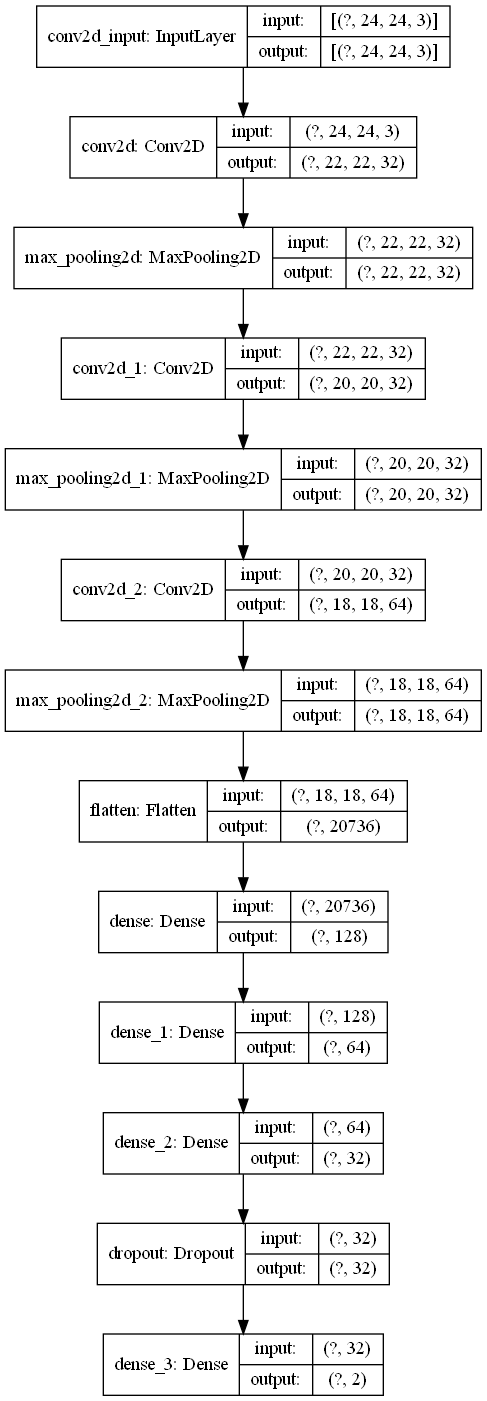

In [5]:
plot_model(model, to_file='Model Plot/Model Plot.png', show_shapes=True, show_layer_names=True)

## Testing Dataset
Testing dataset after model was trained dataset.

In [6]:
batchSize = 32
targetSize = (24,24)

test_generator = generator('Dataset/Test', shuffle=True, 
                           batch_size=batchSize, target_size=targetSize)
stepsPerEpoch = len(test_generator.classes)//batchSize
print('Steps Per Epoch = ', stepsPerEpoch)

image,labels = next(test_generator)
print('Image Shape = ', image.shape)

Found 290 images belonging to 2 classes.
Steps Per Epoch =  9
Image Shape =  (32, 24, 24, 3)


## Evaluating Model

In [7]:
model.evaluate(test_generator)

10/10 [==============================] - 1s 54ms/step - loss: 0.0653 - accuracy: 0.9690


[0.06530538946390152, 0.9689655303955078]

<function matplotlib.pyplot.show(close=None, block=None)>

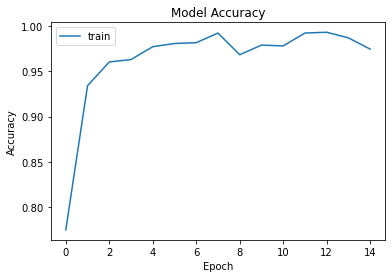

In [8]:
plt.plot(model_history.history['accuracy'])
plt.title("Model Accuracy")
plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.legend(['train'], loc='upper left')
plt.show

## Test Samples
Im testing new image from open eye and closed eye after model was trained data.

In [9]:
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from keras.models import load_model

## Loading Image (Closed Eye)

In [10]:
## Loading Image (Closed Eye)
test_image_1 = load_img('Dataset/Samples Test/Closed Eye.jpg', target_size = (24,24)) ## Convert Size of Image to 24*24
print('Closed Eye Image with size 24*24')
test_image_1

Closed Eye Image with size 24*24


In [11]:
## After Loading Image (Closed Eye), Now the model can predict it.
test_image_1 = img_to_array(test_image_1) ## Convert Image to matrix
test_image_1 = np.expand_dims(test_image_1, axis=0) ## Convert Dimnesion
test_predict_1 = model.predict(test_image_1) ## Send Image ot model to predict it.
result_predict_1 = np.round(test_predict_1).astype(int) ## Convert type to integer instead of float type
result_predict_1

array([[1, 0]])

## Loading Image (Open Eye)

In [12]:
## Loading Image (Open Eye Eye)
test_image_2 = load_img('Dataset/Samples Test/Open Eye.jpg', target_size = (24,24)) ## Convert Size of Image to 24*24
print('Open Eye Image with size 24*24')
test_image_2

Open Eye Image with size 24*24


In [13]:
## After Loading Image (Open Eye), Now the model can predict it.
test_image_2 = img_to_array(test_image_2) ## Convert Image to matrix
test_image_2 = np.expand_dims(test_image_2, axis=0) ## Convert Dimnesion
test_predict_2 = model.predict(test_image_2) ## Send Image ot model to predict it.
result_predict_2 = np.round(test_predict_2).astype(int) ## Convert type to integer instead of float type
result_predict_2

array([[0, 1]])

## Result
The result of model output [1, 0] or [0, 1]
for closed eye [1, 0]
for open eye [0, 1]